# Normal texture to Atlas texture

In [1]:
import sys
sys.path.append('../bin')

from Normal2Atlas import Normal2Atlas
from Atlas2Normal import Atlas2Normal
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## normal texture

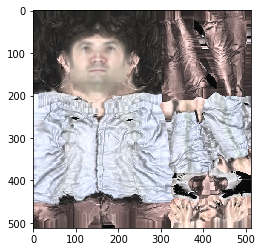

In [2]:
im = Image.open("../input/normal.jpg")
plt.imshow(im)

## vertex mapping only

In [3]:
normal_tex = np.array(im)
converter = Normal2Atlas(normal_size=512, atlas_size=200)
atlas_texture, atlas_ex = converter.mapping(normal_tex)

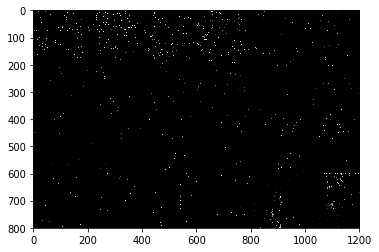

In [4]:
plt.imshow(converter.concat_atlas_tex())

## barycentric coordinates based transition

In [5]:
atlas_texture = converter.convert(normal_tex)

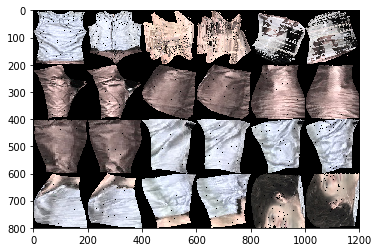

In [6]:
plt.imshow(converter.concat_atlas_tex())

# Atlas texture to Normal texture

## atlas texture

In [7]:
im = Image.open("../input/atlas.png").convert('RGB')
im = np.array(im).transpose(1, 0, 2)

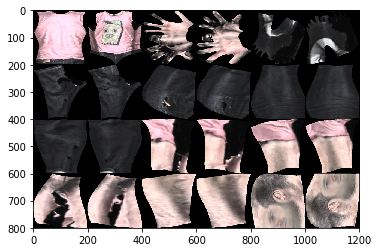

In [8]:
plt.imshow(im)

## vertex mapping only

In [9]:
size = 200
atlas_tex  = np.zeros([24,size,size,3])
for i in range(4):
    for j in range(6):
        atlas_tex[(6*i+j) , :,:,:] = im[(size*i):(size*i+size),(size*j):(size*j+size),: ]
        
atlas_tex.shape

(24, 200, 200, 3)

In [10]:
converter = Atlas2Normal(atlas_size=200, normal_size=512)
normal_tex, normal_ex = converter.mapping(atlas_tex)

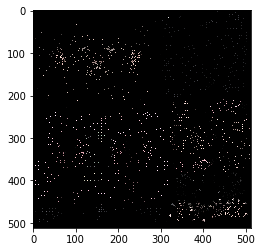

In [11]:
plt.imshow(normal_tex)

## barycentric coordinates based transition

In [12]:
normal_tex = converter.convert(atlas_tex)

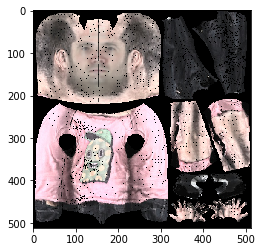

In [13]:
plt.imshow(normal_tex)